<a href="https://colab.research.google.com/github/lin-k23/SAR_ADC/blob/main/script/simulator1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

RISCA

## Install Dependencies

In [ ]:
%pip install numpy matplotlib seaborn pandas
!git clone https://github.com/lin-k23/SAR_ADC.git
%cd SAR_ADC/script/
from preset_mdl import preset_mdl
from preset_pr import preset_pr
from signal_source import signal_source
from RISCA_core import RISCA_core
from analyser.analyser import AnalyserSar
import pandas as pd


[WinError 3] 系统找不到指定的路径。: 'SAR_ADC/script/'
h:\myjupyter\SAR_ADC\script


## Initialize Objects and Pass Configuration Information

In [2]:
# %matplotlib inline
# %pip install jinja2
mdl = preset_mdl()
pr = preset_pr()
# pr['conf_name'] = input('配置文件名: sar/tisar/nssar1o1c/noisar1o1ccp/pipesar2s/...')
cfg_info = pd.DataFrame(pr["T_assembler"])
styled_df = cfg_info.style\
            .set_table_attributes('class="dataframe table table-striped"')\
            .set_properties(**{'text-align': 'center'})\
            .set_caption(f'Configuration Information for {pr["conf_name"]}')
styled_df

Loading file: ..\config\sar\timing_table.xlsx
[preset_pr] TI parameter loaded: pr["TI"]= 1
Loaded Excel configuration:


,frame1,frame2,frame3
Item,,,
CB1,OUT RST SAM1,MSB,LSB


## Input signal & Analysis conversion results

In [3]:
# 定义输入信号峰值
v_in_peak = [0.85, 0]
# 调用 signal_source 函数
v_in_p, v_in_n = signal_source(pr, mdl, v_in_peak)

# Instantiate the device under test
da = RISCA_core(mdl, pr, v_in_p, v_in_n)

## Analysis

offset_nocal = 5.96 LSB


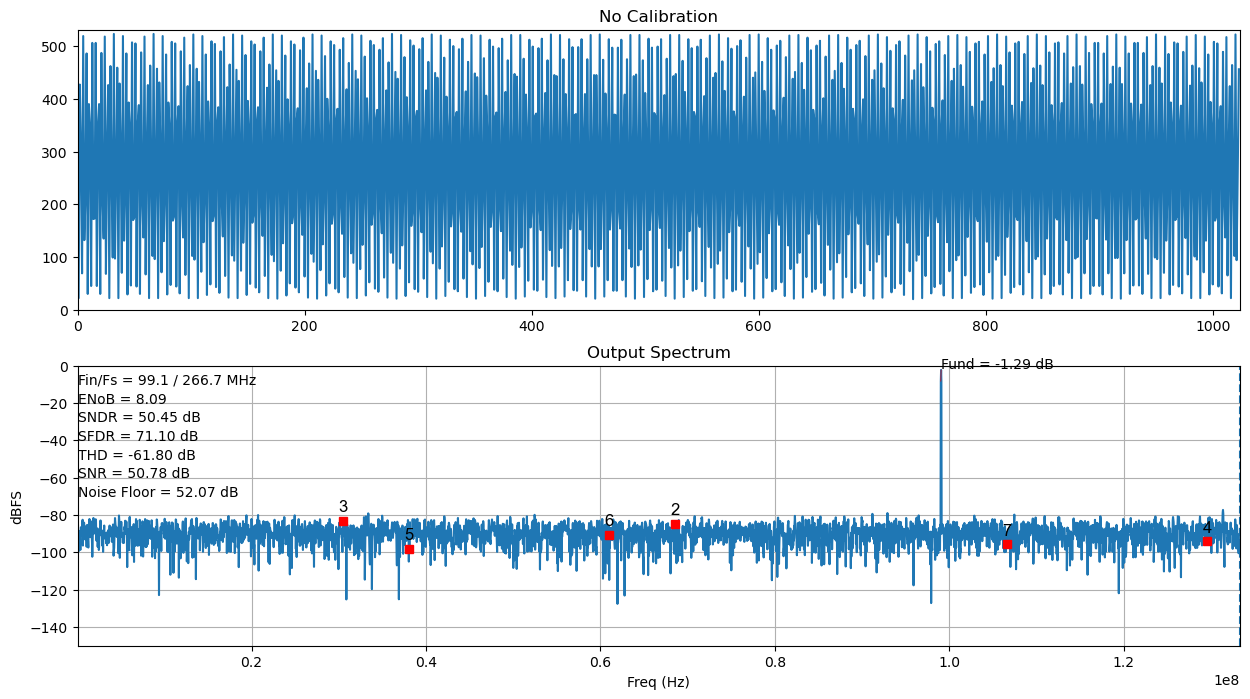

In [4]:
test = AnalyserSar(da, pr)
test.no_calibration()